# Activity 2 - census tracts in Lane County Oregon
## Jett Rugebregt
## 4/10/24

In [1]:
import geopandas as gpd

## Task 1

In [2]:
# import file

file = gpd.read_file("C:/Users/jettr/Dropbox (University of Oregon)/23-24/Spring/Geog 490/Activities/2_CensusTracts/data/data.shp")

In [3]:
file.shape
# File has 6 columns and 92 rows

(92, 6)

In [4]:
file.head()

,STATEFP,COUNTYFP,TRACTCE,B19301_001,B01003_001,geometry
0,41,039,3700,12810.0,5520.0,"POLYGON ((-123.08709 44.05208, -123.08706 44.0..."
1,41,039,4900,40551.0,5074.0,"POLYGON ((-123.07644 44.03223, -123.07628 44.0..."
2,41,039,100,45908.0,5141.0,"POLYGON ((-122.85993 44.02930, -122.85909 44.0..."
3,41,039,404,48144.0,4546.0,"POLYGON ((-123.24868 44.28373, -123.24490 44.2..."
4,41,039,903,34472.0,5593.0,"POLYGON ((-123.35565 44.06399, -123.35563 44.0..."


### a. Number of Columns

In [5]:
numcols = len(file.columns)
print('The Number of Columns is : ' + str(numcols))
# Names of the Columns

The Number of Columns is : 6


### b. Number of Rows

In [6]:
file.shape
# File has 6 columns and 92 rows

numrows = len(file['STATEFP'])
print('The Length of the column = Number of rows, which is : ' + str(numrows))

The Length of the column = Number of rows, which is : 92


### c. Max B01003_001 Value

In [7]:
MaxPop = file['B01003_001'].max() # Find the Max value in 'B01003_001' column and create a callable variable 'MaxPop'
print('Max Population for a given region is : ' + str(MaxPop))

Max Population for a given region is : 7187.0


### d. The minimum B19301_001 valueue

In [8]:
MinIncome = file['B19301_001'].min()
print('Lane County Minimum income in USD : ' + str(MinIncome))

Lane County Minimum income in USD : 12810.0


### e. The Mean B19301_001 Valueue

In [9]:
MeanIncome = file['B19301_001'].mean()
print('Lane County Mean income in USD : ' + str(MeanIncome))

Lane County Mean income in USD : 33795.815217391304


## Task 2

### a. reproject the shapefile

In [10]:
file_UTM10 = file.to_crs(epsg=32610) # WGS UTM 10 for Lane County Oregon
print(file_UTM10.head())

  STATEFP COUNTYFP  TRACTCE  B19301_001  B01003_001  \
0      41      039     3700     12810.0      5520.0   
1      41      039     4900     40551.0      5074.0   
2      41      039      100     45908.0      5141.0   
3      41      039      404     48144.0      4546.0   
4      41      039      903     34472.0      5593.0   

                                            geometry  
0  POLYGON ((493024.410 4877660.939, 493026.341 4...  
1  POLYGON ((493875.471 4875454.940, 493888.533 4...  
2  POLYGON ((511224.619 4875136.530, 511292.250 4...  
3  POLYGON ((480158.224 4903415.950, 480459.834 4...  
4  POLYGON ((471517.303 4879040.789, 471519.356 4...  


### b. Convert to km^2 . c. Calculate the Max Population density, b. Min and c. Mean. 

In [11]:
# Calculate population density (population / area) in km²
AreaConverted = (file_UTM10.geometry.area / 10**6) # m*m (1 km/1000 m)^2 = km*km

file_UTM10['population_density'] = file_UTM10['B01003_001'] / AreaConverted  # Convert area to km²


In [12]:
# Print the first few rows to verify the new column
print(file_UTM10.head())

  STATEFP COUNTYFP  TRACTCE  B19301_001  B01003_001  \
0      41      039     3700     12810.0      5520.0   
1      41      039     4900     40551.0      5074.0   
2      41      039      100     45908.0      5141.0   
3      41      039      404     48144.0      4546.0   
4      41      039      903     34472.0      5593.0   

                                            geometry  population_density  
0  POLYGON ((493024.410 4877660.939, 493026.341 4...         2432.964298  
1  POLYGON ((493875.471 4875454.940, 493888.533 4...         1736.407834  
2  POLYGON ((511224.619 4875136.530, 511292.250 4...            2.353018  
3  POLYGON ((480158.224 4903415.950, 480459.834 4...           56.896571  
4  POLYGON ((471517.303 4879040.789, 471519.356 4...          107.126233  


In [13]:
popdenseMAX = file_UTM10['population_density'].max()
popdenseMIN = file_UTM10['population_density'].min()
popdenseMEAN = file_UTM10['population_density'].mean()

print('Population Density per km^2')
print('The Max Population density is : ' + str(popdenseMAX))
print('The Min Population density is : ' + str(popdenseMIN))
print('The Mean Population density is : ' + str(popdenseMEAN))

Population Density per km^2
The Max Population density is : 10353.848961731399
The Min Population density is : 1.9120719575124348
The Mean Population density is : 1216.78725497439


## Task 3

### a. Make a chloropleth Map of Population Density

In [14]:
import matplotlib as plt
import numpy as np

Text(78.72222222222221, 0.5, 'Latitude')

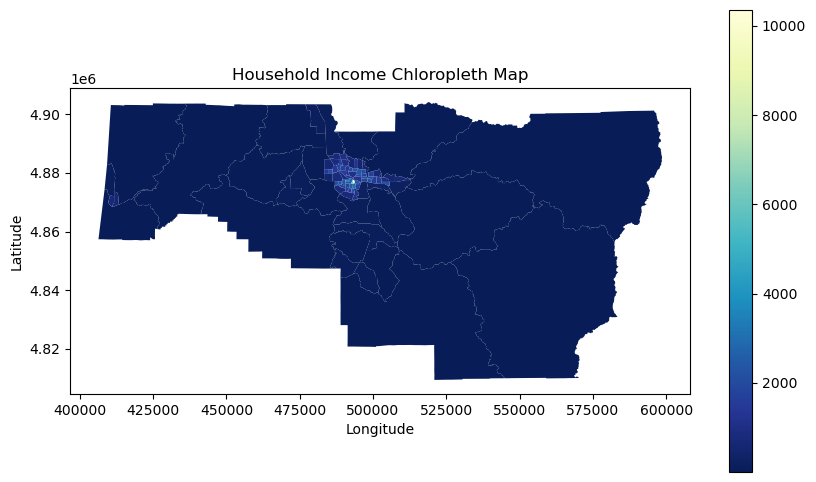

In [32]:
ax = file_UTM10.plot(column='population_density', cmap='YlGnBu_r', legend=True, figsize=(10, 6))
ax.set_title('Household Income Chloropleth Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
# On a log scale, this map is a bit harder to compare the population density

### b. Make a map with Income

Text(78.72222222222221, 0.5, 'Latitude')

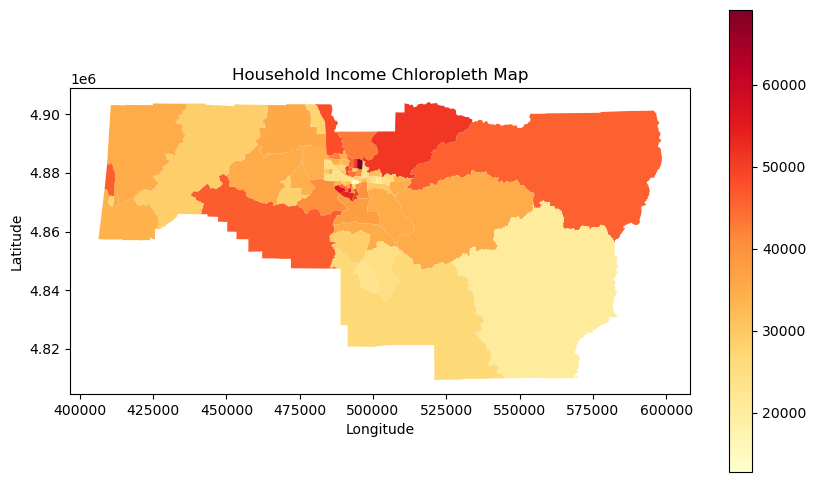

In [21]:
ax = file_UTM10.plot(column='B19301_001', cmap='YlOrRd', legend=True, figsize=(10, 6))
ax.set_title('Household Income Chloropleth Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')